<a href="https://colab.research.google.com/github/srathina/Python/blob/master/machine_learning/machine_learning_fruit_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [164]:
#import the required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#load the data set and review the contents

fruits = pd.read_table("https://raw.githubusercontent.com/srathina/Python/master/machine_learning/fruit_data_with_colors.txt")
fruits.head()





,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [165]:
#define the feature and label and split the train/test data.

feature_names = ['mass', 'width', 'height']
label_names = ['fruit_label']

X = fruits[feature_names]
y = fruits[label_names]

print(X.shape)
print(y.shape)

x_train, x_test, y_train, y_test = train_test_split(X,y, train_size = 0.75)

#print(x_train, y_train)
print(x_train.shape,y_train.shape)

#print(x_test,y_test)
print(x_test.shape,y_test.shape)




(59, 3)
(59, 1)
(44, 3) (44, 1)
(15, 3) (15, 1)


In [166]:
#Train the model using knn classifier 

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train,np.ravel(y_train))



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [167]:
#predict the test label

y_pred = knn.predict(x_test)

y_pred

array([3, 3, 3, 3, 3, 1, 4, 3, 1, 1, 3, 1, 3, 4, 3])

In [168]:
#measure the model

from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[4 6 1]
 [0 3 0]
 [0 0 1]]
              precision    recall  f1-score   support

           1       1.00      0.36      0.53        11
           3       0.33      1.00      0.50         3
           4       0.50      1.00      0.67         1

    accuracy                           0.53        15
   macro avg       0.61      0.79      0.57        15
weighted avg       0.83      0.53      0.54        15



In [0]:
#identify the best k value
import sys

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, np.ravel(y_train))
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != np.ravel(y_test)))


Text(0, 0.5, 'Mean Error')

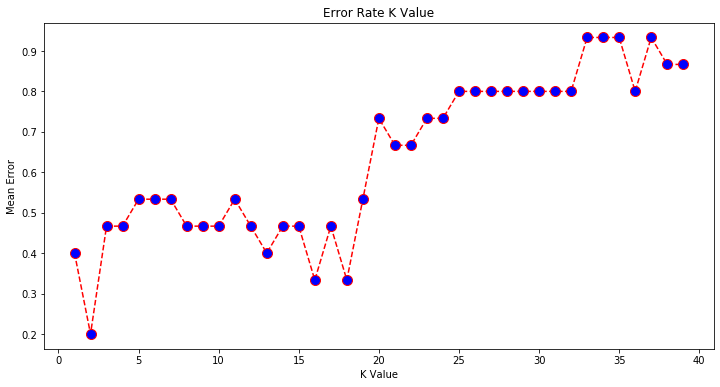

In [170]:
#plot the metrics to identify the best k value.


plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')